In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [4]:
crime_data=pd.read_csv('crime_data.csv')
crime_data

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


In [5]:
crime_data.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [6]:
crime_data.shape

(50, 5)

In [7]:
crime_data.dtypes

Unnamed: 0     object
Murder        float64
Assault         int64
UrbanPop        int64
Rape          float64
dtype: object

In [8]:
crime_data.isna().sum()

Unnamed: 0    0
Murder        0
Assault       0
UrbanPop      0
Rape          0
dtype: int64

In [9]:
crime_data.rename(columns={'Unnamed: 0':'country'},inplace=True)
crime_data.head()

,country,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [10]:
x=crime_data.iloc[:,1:]

In [12]:
from sklearn.preprocessing import StandardScaler
crime_data_std=StandardScaler().fit_transform(x)

In [13]:
crime_data_std

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 ],
       [ 2.22926518,  0.48775713, -0.38662083,  0.49265293],
       [-0.57702994, -1.51224105,  1.21848371, -0.11129987],
       [-1.20322802, -0.61527217, -0.80534376, -0.75839217],
       [ 0.60578867,  0.94836277,  1.21848371,  0.29852525],
       [-0.13637203, -0.70012057, -0.03768506, -0.0250209 ],
       [-1.29599811, -1.39102904, -0.5959823 , -1.07115345],
       [-0.41468229, -0.67587817,  0.03210209, -0.34856705],
       [ 0.44344101, -0.

In [14]:
crime_data_scaled=pd.DataFrame(crime_data_std,columns=('Murder','Assault','UrbanPop','Rape'))
#crime_data_scaled['country']=crime_data['country']
#crime_data_scaled

In [15]:
import scipy.cluster.hierarchy as sch

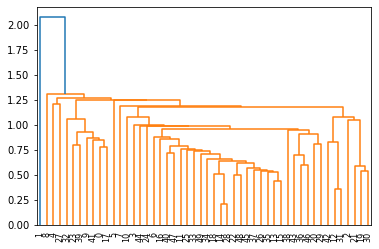

In [16]:
dendogram=sch.dendrogram(sch.linkage(crime_data_scaled,method='single', metric='euclidean'))

In [17]:
from sklearn.cluster import AgglomerativeClustering

In [18]:
hc=AgglomerativeClustering(n_clusters=2,linkage='single')
hc

AgglomerativeClustering(linkage='single')

In [19]:
y_hc=hc.fit_predict(crime_data_scaled)
y_hc

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0], dtype=int64)

In [20]:
cluster_ag=pd.DataFrame({'cluster':y_hc})
cluster_ag

,cluster
0,0
1,1
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,0


In [21]:
crime_data1=crime_data
crime_data1

,country,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


In [22]:
crime_data1['cluster']=cluster_ag

In [23]:
crime_data1.head()

,country,Murder,Assault,UrbanPop,Rape,cluster
0,Alabama,13.2,236,58,21.2,0
1,Alaska,10.0,263,48,44.5,1
2,Arizona,8.1,294,80,31.0,0
3,Arkansas,8.8,190,50,19.5,0
4,California,9.0,276,91,40.6,0


## 1st Cluster

In [24]:
crime_data1[crime_data1['cluster']==0]

,country,Murder,Assault,UrbanPop,Rape,cluster
0,Alabama,13.2,236,58,21.2,0
2,Arizona,8.1,294,80,31.0,0
3,Arkansas,8.8,190,50,19.5,0
4,California,9.0,276,91,40.6,0
5,Colorado,7.9,204,78,38.7,0
6,Connecticut,3.3,110,77,11.1,0
7,Delaware,5.9,238,72,15.8,0
8,Florida,15.4,335,80,31.9,0
9,Georgia,17.4,211,60,25.8,0
10,Hawaii,5.3,46,83,20.2,0


### 2nd Cluster

In [26]:
crime_data1[crime_data1['cluster']==1]

,country,Murder,Assault,UrbanPop,Rape,cluster
1,Alaska,10.0,263,48,44.5,1


### KMEAN Clustering

In [27]:
from sklearn.cluster import KMeans

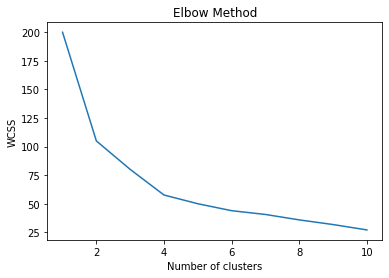

In [28]:
x=[]
for i in range (1,11):
    cluster_kmean=KMeans(n_clusters=i)
    cluster_kmean.fit(crime_data_std)
    x.append(cluster_kmean.inertia_)
    
plt.plot(range(1,11),x)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

* There is a deap dip in thhe elbow curve which gives the optimum number of k-values

* When the value of K is 2, The dip is more than others

* Hence,optimum number of K valur is 2

In [31]:
cluster_kmean=KMeans(n_clusters=2)
cluster_kmean.fit(crime_data_std)

KMeans(n_clusters=2)

In [32]:
cluster_kmean.labels_

array([0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1])

In [33]:
cluster_kmean=cluster_kmean.labels_

In [34]:
crime_data2=crime_data

In [35]:
crime_data2['cluster']=cluster_kmean
crime_data2.head()

,country,Murder,Assault,UrbanPop,Rape,cluster
0,Alabama,13.2,236,58,21.2,0
1,Alaska,10.0,263,48,44.5,0
2,Arizona,8.1,294,80,31.0,0
3,Arkansas,8.8,190,50,19.5,1
4,California,9.0,276,91,40.6,0


In [36]:
crime_data2[crime_data2['cluster']==0],crime_data2[crime_data2['cluster']==0].shape

(           country  Murder  Assault  UrbanPop  Rape  cluster
 0          Alabama    13.2      236        58  21.2        0
 1           Alaska    10.0      263        48  44.5        0
 2          Arizona     8.1      294        80  31.0        0
 4       California     9.0      276        91  40.6        0
 5         Colorado     7.9      204        78  38.7        0
 8          Florida    15.4      335        80  31.9        0
 9          Georgia    17.4      211        60  25.8        0
 12        Illinois    10.4      249        83  24.0        0
 17       Louisiana    15.4      249        66  22.2        0
 19        Maryland    11.3      300        67  27.8        0
 21        Michigan    12.1      255        74  35.1        0
 23     Mississippi    16.1      259        44  17.1        0
 24        Missouri     9.0      178        70  28.2        0
 27          Nevada    12.2      252        81  46.0        0
 30      New Mexico    11.4      285        70  32.1        0
 31     

In [37]:
crime_data2[crime_data2['cluster']==1],crime_data2[crime_data2['cluster']==1].shape

(          country  Murder  Assault  UrbanPop  Rape  cluster
 3        Arkansas     8.8      190        50  19.5        1
 6     Connecticut     3.3      110        77  11.1        1
 7        Delaware     5.9      238        72  15.8        1
 10         Hawaii     5.3       46        83  20.2        1
 11          Idaho     2.6      120        54  14.2        1
 13        Indiana     7.2      113        65  21.0        1
 14           Iowa     2.2       56        57  11.3        1
 15         Kansas     6.0      115        66  18.0        1
 16       Kentucky     9.7      109        52  16.3        1
 18          Maine     2.1       83        51   7.8        1
 20  Massachusetts     4.4      149        85  16.3        1
 22      Minnesota     2.7       72        66  14.9        1
 25        Montana     6.0      109        53  16.4        1
 26       Nebraska     4.3      102        62  16.5        1
 28  New Hampshire     2.1       57        56   9.5        1
 29     New Jersey     7

In [38]:
crime_data2[crime_data2['cluster']==2],crime_data2[crime_data2['cluster']==2].shape

(Empty DataFrame
 Columns: [country, Murder, Assault, UrbanPop, Rape, cluster]
 Index: [],
 (0, 6))

In [39]:
crime_data2[crime_data2['cluster']==3],crime_data2[crime_data2['cluster']==3].shape

(Empty DataFrame
 Columns: [country, Murder, Assault, UrbanPop, Rape, cluster]
 Index: [],
 (0, 6))

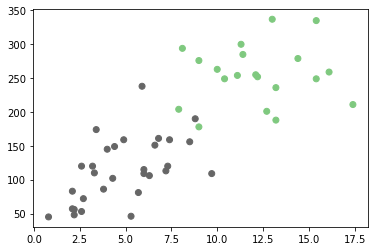

In [40]:
plt.scatter(crime_data.Murder,crime_data.Assault,c=cluster_kmean,cmap=plt.cm.Accent)

## DBSCAN

In [41]:
from sklearn.cluster import DBSCAN

In [42]:
cluster_dbscan=DBSCAN(eps=0.7,min_samples=3)

In [43]:
cluster_dbscan.fit(crime_data_std)

DBSCAN(eps=0.7, min_samples=3)

In [44]:
cluster=cluster_dbscan.labels_

In [45]:
crime_data3=crime_data

In [46]:
crime_data3['cluster']=cluster

In [47]:
crime_data3['cluster'].nunique()

3

In [48]:
import matplotlib.pyplot as plt

In [49]:
crime_data.corr()

,Murder,Assault,UrbanPop,Rape,cluster
Murder,1.000000,0.801873,0.069573,0.563579,-0.099392
Assault,0.801873,1.000000,0.258872,0.665241,-0.085872
UrbanPop,0.069573,0.258872,1.000000,0.411341,0.021881
Rape,0.563579,0.665241,0.411341,1.000000,-0.019589
cluster,-0.099392,-0.085872,0.021881,-0.019589,1.000000


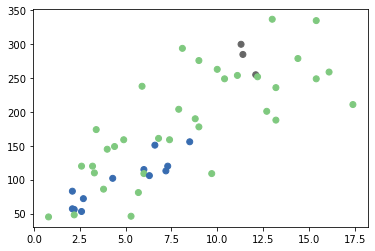

In [50]:
plt.scatter(crime_data.Murder,crime_data.Assault,c=cluster,cmap=plt.cm.Accent)

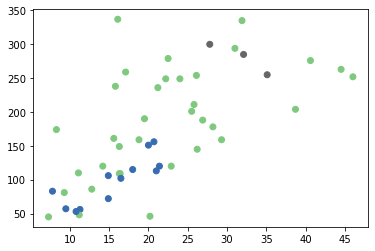

In [52]:
plt.scatter(crime_data.Rape,crime_data.Assault,c=cluster,cmap=plt.cm.Accent)